In [21]:
# Generating a toy dataset.
# DO NOT MODIFY THIS PART

import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(9)))

def y_gen(x):
    h_11 = math.tanh(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = math.tanh(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_21 = 1/(1 + np.exp(-(paras[6] * h_11 + paras[7] * h_12 + paras[8])))
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

In [22]:
# Spliting dataset into training, validation, and test.
# DO NOT MODIFY THIS PART

from sklearn.model_selection import train_test_split

r = 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=r)

x_val = x_train[:int(n*r)]
partial_x_train = x_train[int(n*r):]
y_val = y_train[:int(n*r)]
partial_y_train = y_train[int(n*r):]

*** Write down your answer here ***

Formula of bias for layer 2

$$\frac{\partial L}{\partial b^2} = 2(\hat{y_{1}} - y_{1})\hat{y_{1}}(1-\hat{y_{1}})$$

Formula of weights of layer 2
$$\frac{\partial L}{\partial \vec{w}^{\,(2)}} = \begin{bmatrix}
\frac{\partial L}{\partial w^2_{11}}\\
\frac{\partial L}{\partial w^2_{21}}
\end{bmatrix} = \begin{bmatrix}
2(\hat{y_{1}} - y_{1})\hat{y_{1}}(1-\hat{y_{1}})\mathrm{h}_{1}^{1} \\
2(\hat{y_{1}} - y_{1})\hat{y_{1}}(1-\hat{y_{1}})\mathrm{h}_{2}^{1}
\end{bmatrix}
$$

Formula of biases of layer 1
$$\frac{\partial L}{\partial \vec{b}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial b^1_1}\\
\frac{\partial L}{\partial b^1_2}
\end{bmatrix} = \begin{bmatrix}
[2(\hat{y_{1}} - y_{1})\hat{y_{1}}(1-\hat{y_{1}})\mathrm{w}_{11}^{2}](1-(\mathrm{h}_{1}^{1})^2)\\
[2(\hat{y_{1}} - y_{1})\hat{y_{1}}(1-\hat{y_{1}})\mathrm{w}_{21}^{2}](1-(\mathrm{h}_{2}^{1})^2)
\end{bmatrix}
$$

Formula of weights of layer 1
$$
\frac{\partial L}{\partial \vec{W}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial w^1_{11}} & \frac{\partial L}{\partial w^1_{12}}\\
\frac{\partial L}{\partial w^1_{21}} & \frac{\partial L}{\partial w^1_{22}}
\end{bmatrix} = \begin{bmatrix}
[2(\hat{y_{1}} - y_{1})\hat{y_{1}}(1-\hat{y_{1}})\mathrm{w}_{11}^{2}](1-(\mathrm{h}_{1}^{1})^2)x_{1} & [2(\hat{y_{1}} - y_{1})\hat{y_{1}}(1-\hat{y_{1}})\mathrm{w}_{21}^{2}](1-(\mathrm{h}_{2}^{1})^2)x_{1} \\
[2(\hat{y_{1}} - y_{1})\hat{y_{1}}(1-\hat{y_{1}})\mathrm{w}_{11}^{2}](1-(\mathrm{h}_{1}^{1})^2)x_{2} & [2(\hat{y_{1}} - y_{1})\hat{y_{1}}(1-\hat{y_{1}})\mathrm{w}_{21}^{2}](1-(\mathrm{h}_{2}^{1})^2)x_{2}
\end{bmatrix}
$$

In [25]:
import numpy as np

class nn:

    # Define activation functions
    def tanh(self, x):
        return np.tanh(x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Define model architecture
    def __init__(self, input_size, hiddenlayer, output_size):
        self.model = {}
        self.model['W1'] = np.random.randn(hiddenlayer, input_size)
        self.model['b1'] = np.random.randn(hiddenlayer, 1)
        self.model['W2'] = np.random.randn(output_size, hiddenlayer)
        self.model['b2'] = np.random.randn(output_size, 1)

    # Define forward propagation function
    def forward_propagation(self, x):
        W1 = self.model['W1']
        W2 = self.model['W2']
        b1 = self.model['b1']
        b2 = self.model['b2']
        Z1 = np.dot(x, W1.T) + b1.T
        A1 = self.tanh(Z1)
        Z2 = np.dot(A1, W2.T) + b2.T
        A2 = self.sigmoid(Z2)
        cache = (Z1, A1, Z2, A2)
        self.cache = cache
        return A2

    # Define loss function
    def compute_loss(self, Y, Y_pred):
        m = Y.shape[0]
        loss = (1 / (2 * m)) * np.sum(np.square(Y_pred - Y))
        return loss

    # Define backward propagation function
    def backward_propagation(self, X, Y, cache):
        m = X.shape[0]
        Z1, A1, Z2, A2 = cache
        dZ2 = A2 - Y.T
        dW2 = (1 / m) * np.dot(dZ2.T, A1)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.multiply(np.dot(dZ2, self.model['W2']).T, 1 - np.square(A1))
        dW1 = (1 / m) * np.dot(dZ1, X)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
        grads = {'dW2': dW2, 'db2': db2, 'dW1': dW1, 'db1': db1}
        return grads

    # Define gradient descent function
    def gradient_descent(self, grads, learning_rate):
        self.model['W1'] -= learning_rate * grads['dW1']
        self.model['b1'] -= learning_rate * grads['db1']
        self.model['W2'] -= learning_rate * grads['dW2']
        self.model['b2'] -= learning_rate * grads['db2']

    # Train the model
    def train_model(self, X, Y, X_val, Y_val, num_epochs, learning_rate):
          loss_values = []
          val_loss_values = []
          for i in range(num_epochs):
              # Forward propagation on training set
              Y_pred = self.forward_propagation(X)
              loss = self.compute_loss(Y, Y_pred)
              loss_values.append(loss)

              # Backward propagation and gradient descent
              grads = self.backward_propagation(X, Y, self.cache)
              self.gradient_descent(grads, learning_rate)

              # Forward propagation on validation set
              Y_val_pred = self.forward_propagation(X_val)
              val_loss = self.compute_loss(Y_val, Y_val_pred)
              val_loss_values.append(val_loss)

          return loss_values, val_loss_values

  # Create and train the model
model = nn(input_size=2,hiddenlayer=2,output_size=1)
# Convert data to numpy arrays
partial_x_train = np.array(partial_x_train)
partial_y_train = np.array(partial_y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
loss_values, val_loss_values = model.train_model(partial_x_train, partial_y_train, x_val, y_val, 100, 0.1)


Epoch 1/100
150/150 [==============================] - 1s 3ms/step - loss: 0.0303 - val_loss: 0.0272
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0294 - val_loss: 0.0264
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0285 - val_loss: 0.0256
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0277 - val_loss: 0.0248
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.0241
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0260 - val_loss: 0.0234
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0251 - val_loss: 0.0227
Epoch 8/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0243 - val_loss: 0.0220
Epoch 9/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.0213
Epoch 10/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0227 - val_lo

150/150 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 82/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 83/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 84/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 85/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0068
Epoch 86/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0068
Epoch 87/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0068
Epoch 88/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0068
Epoch 89/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0068
Epoch 90/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 

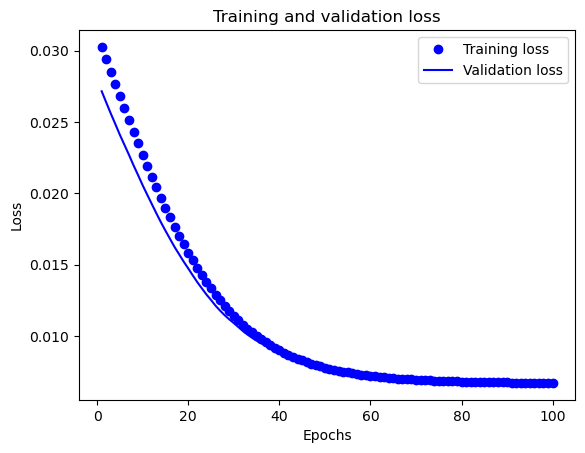

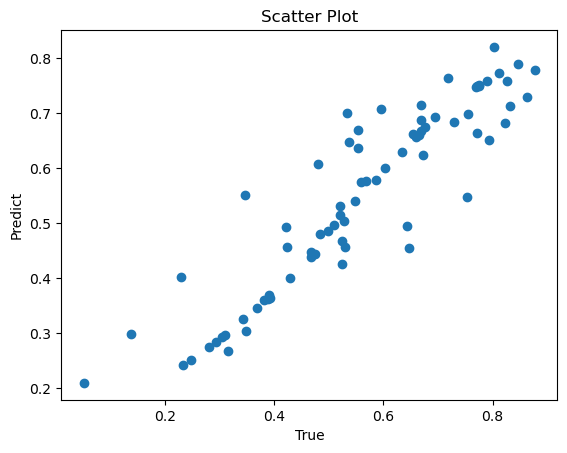

In [26]:
# Visualizing losses and prediction
# DO NOT MODIFY THIS PART

import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.title('Scatter Plot')
plt.xlabel('True')
plt.ylabel('Predict')
plt.scatter(y_test, y_pred)